In [1]:
#Import dependencies
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator
import holoviews as hv
import hvplot.pandas
from warnings import filterwarnings

In [2]:
# Set up the environment: Ignore warnings and apply the 'paper' theme in Seaborn
filterwarnings("ignore")
sns.set_theme('paper')

In [3]:
#Read data from CSV files
finance_df = pd.read_csv("Datasets/Financial_stock_data.csv")
health_df = pd.read_csv("Datasets/Healthcare_Stock_Data4.csv")
auto_df = pd.read_csv("Datasets/Auto_stock_data.csv")
tech_df = pd.read_csv("Datasets/tech_data.csv")

In [4]:
#Merge the dataframes
merge1_df = pd.merge(finance_df, tech_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merge2_df = pd.merge(merge1_df, auto_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merged_df = pd.merge(merge2_df, health_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")

merged_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume,Unnamed: 0
0,2018-01-02,WD,Finance,Mortgage,47.700001,47.919998,47.259998,47.320000,181300.0,NaN
1,2018-01-03,WD,Finance,Mortgage,47.230000,47.230000,46.090000,46.130001,134800.0,NaN
2,2018-01-04,WD,Finance,Mortgage,46.189999,46.810001,46.090000,46.099998,140200.0,NaN
3,2018-01-05,WD,Finance,Mortgage,46.110001,48.060001,45.349998,47.980000,336900.0,NaN
4,2018-01-08,WD,Finance,Mortgage,48.160000,48.880001,47.369999,47.820000,310100.0,NaN
...,...,...,...,...,...,...,...,...,...,...
114456,2023-11-22,MRK,Healthcare,Drug Manufacturers,102.200000,102.680000,101.110000,101.680000,5724130.0,NaN
114457,2023-11-24,MRK,Healthcare,Drug Manufacturers,102.260000,102.513600,101.440000,101.870000,3167952.0,NaN
114458,2023-11-27,MRK,Healthcare,Drug Manufacturers,101.910000,102.150000,100.700000,101.430000,7356536.0,NaN
114459,2023-11-28,MRK,Healthcare,Drug Manufacturers,101.310000,101.350000,100.010000,100.180000,8738483.0,NaN


# **Overall Performance**

In this part of Script, Percentage of change was calculated for each stock from Open price of the earliest date to the Close price of the latest date available for that ticker. And creating a Dataframe with Open Price on earliest date, Close price on latest date and change occurred in price in percentage.

In [5]:
#Define lists to append calculated data
open_price = []
close_price = []
change_price = []
ticker = []
sectors = []
industry = []

#Loop through each sector
for sector in merged_df["Sector"].unique():

    sector_df = merged_df.loc[merged_df["Sector"] == sector]

  #Loop through each ticker
    for symbols in sector_df["Ticker"].unique():

        #Dataframe for each iteration of loop
        con_df = sector_df.loc[sector_df["Ticker"] == symbols]

        #Convert the "date" column to datetime
        con_df["Date"] = pd.to_datetime(con_df["Date"])

        #Find the Open price with the earliest date
        earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]

        #Find the Close price with the latest date
        latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]

        #Calculate change in price
        percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

        #Appending data in lists
        ticker.append(symbols)
        sectors.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
        industry.append(con_df.loc[con_df["Date"].idxmin(), "Industry"])
        open_price.append(earliest_date_row)
        close_price.append(latest_date_row)
        change_price.append(percent_change_price)

#Create a dataframe with calculated values
analysis_df = pd.DataFrame({
    "Ticker" : ticker,
    "Sector" : sectors,
    "Industry" : industry,
    "Initial Open" : open_price,
    "Final Close" : close_price,
    "Total Change in Percent" : change_price

})
analysis_df

,Ticker,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,WD,Finance,Mortgage,47.700001,89.870003,88.406711
1,PFSI,Finance,Mortgage,22.350000,79.779999,256.957483
2,LDI,Finance,Mortgage,14.000000,1.980000,-85.857143
3,GHI,Finance,Mortgage,18.150000,17.040001,-6.115695
4,COOP,Finance,Mortgage,10.320000,62.709999,507.655048
...,...,...,...,...,...,...
75,PFE,Healthcare,Drug Manufacturers,36.380000,30.080000,-17.317207
76,JNJ,Healthcare,Drug Manufacturers,139.660000,152.110000,8.914507
77,LLY,Healthcare,Drug Manufacturers,84.460000,591.860000,600.757755
78,AZN,Healthcare,Drug Manufacturers,35.240000,64.120000,81.952327


# Performance by Sector

Then, it group the data by Sector and Industry to get the average change in price for each Industry in each Sector.

In [6]:
#Group the data by Sector and Industry to calculate average change in price for each industry under each sector
perf_by_sector = pd.DataFrame(analysis_df.groupby(["Sector", "Industry"])["Total Change in Percent"].mean())

#Show the result
perf_by_sector

Total Change in Percent
Sector      Industry                                               
Automobiles Auto & Truck Dealerships                     111.703054
            Auto Manufacturers                            -4.721549
            Auto Parts                                     7.787522
            Semiconductors                               311.366607
Finance     Asset Management                              18.186490
            Credit Services                               81.657920
            Insurance                                     66.003138
            Mortgage                                     152.209281
Healthcare  Biotechnology                                178.293249
            Drug Manufacturers                           150.602773
            Healthcare plans                              72.534892
            Medical Instruments & supplies                72.354319
Technology  Consumer                                      72.043735
            Infotech                                      26.190427
            Semiconductors                                69.240697
            Software                                     161.812711

Then, Plot the data using Seaborn.

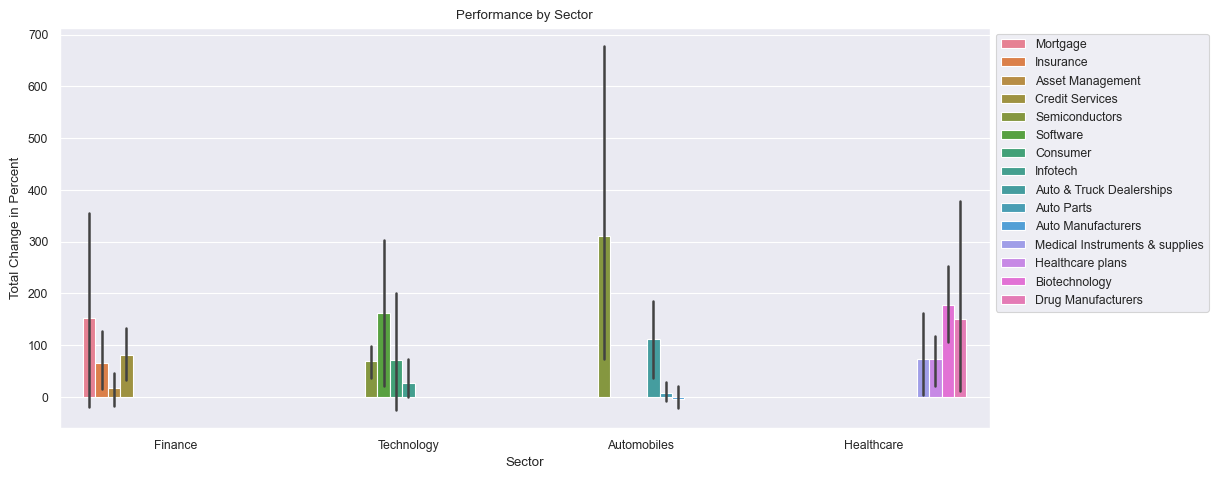

In [7]:
#Plot grouped bar chart using seaborn
plt.figure(figsize=(12, 5.2))
ax = sns.barplot(analysis_df, x="Sector", y="Total Change in Percent", hue ="Industry")

ax.legend(loc = "best", bbox_to_anchor=(1, 1))
ax.set_title("Performance by Sector")

#Save the Output
# plt.savefig("Finances/fig1.png")

#Show the Output
plt.show()

Then, the code get the best performing stock per Sector and Close price for those stocks will be retrieved into one dataframe along with Ticker and Date to plot the line graph for those tickers over the years available in dataset.

# **Best Performers by Sector**

In [8]:
#idxmax returns the index of the max value
best_performer_df = analysis_df.iloc[analysis_df.groupby("Sector")["Total Change in Percent"].idxmax()].reset_index(drop = True)

#Show the result
best_performer_df

,Ticker,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,AMD,Automobiles,Semiconductors,10.42,118.570000,1037.907869
1,COOP,Finance,Mortgage,10.32,62.709999,507.655048
2,LLY,Healthcare,Drug Manufacturers,84.46,591.860000,600.757755
3,NOW,Technology,Software,131.00,687.620000,424.900763


In [9]:
top_performers_by_sector = best_performer_df["Ticker"]
ls= []
for ticker in top_performers_by_sector:
    line_df = merged_df.loc[(merged_df["Ticker"] == ticker),["Ticker","Date", "Close"]]
    line_df["Year"] = pd.to_datetime(line_df["Date"]).dt.year

    ls.append(line_df)
plot_df = pd.concat(ls, ignore_index = True)
plot_df["Date"] = pd.to_datetime(plot_df["Date"])
plot_df

,Ticker,Date,Close,Year
0,AMD,2018-01-02,10.98,2018
1,AMD,2018-01-03,11.55,2018
2,AMD,2018-01-04,12.12,2018
3,AMD,2018-01-05,11.88,2018
4,AMD,2018-01-08,12.28,2018
...,...,...,...,...
5955,NOW,2023-11-28,665.24,2023
5956,NOW,2023-11-29,678.93,2023
5957,NOW,2023-11-30,685.74,2023
5958,NOW,2023-12-01,690.79,2023


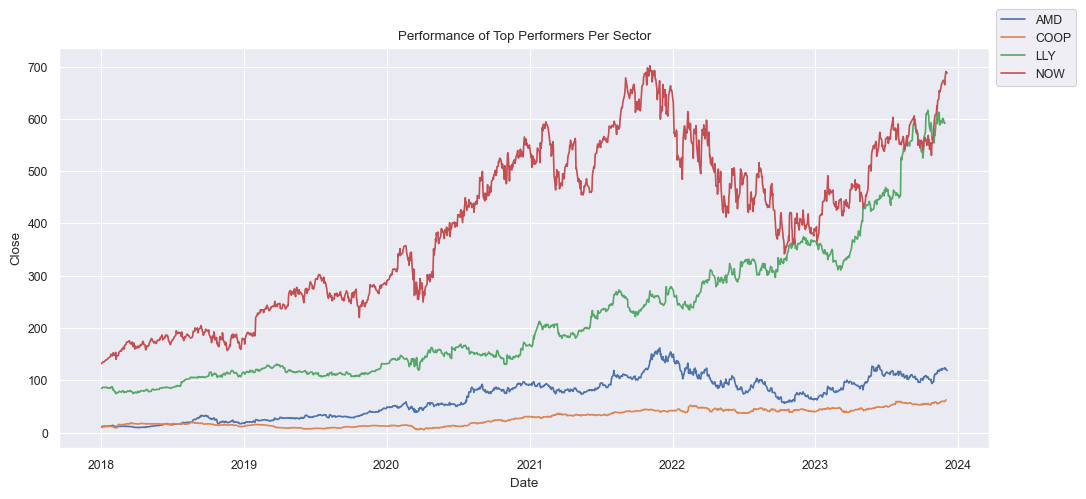

In [10]:
#Plot line graph using seaborn
plt.figure(figsize=(12, 5.2))
fig2 = sns.lineplot(data=plot_df, x = "Date", y = "Close", hue = "Ticker")
fig2.set_title("Performance of Top Performers Per Sector")

fig2.legend(loc = "right", bbox_to_anchor=(1.1, 1))

#Set xtick labels as years
fig2.xaxis.set_major_locator(YearLocator())

#Save the Output
# plt.savefig("Finances/fig2.png")

#Show the Output
plt.show()

# **Performance by Year**

Here the script will calculate the Percentage Change in Close price on latest date of year and Open Price on earliest date of year, for each year of each ticker.

In [11]:
#Convert "date" column to respective year using datetime
merged_df["Year"] = pd.to_datetime(merged_df["Date"]).dt.year

#Defining lists to append calculated data
open_price = []
close_price = []
change_price = []
ticker = []
sector = []
industry = []
year_ls = []

#Loop thorugh data based on year
for year in merged_df["Year"].unique():

    #Dataframe for each iteration of loop
    yearly_df = merged_df.loc[merged_df["Year"] == year]

    #Loop through each ticker for that specific year
    for symbols in yearly_df["Ticker"].unique():

        #Dataframe for each iteration of loop
        con_df = yearly_df.loc[yearly_df["Ticker"] == symbols]

        #Convert the "date" column to datetime
        con_df["Date"] = pd.to_datetime(con_df["Date"])

        #Find the Open price with the earliest date
        earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]

        #Find the Close price with the latest date
        latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]

        #Calculate change in price
        percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

        #Appending data in lists
        ticker.append(symbols)
        sector.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
        industry.append(con_df.loc[con_df["Date"].idxmin(), "Industry"])
        open_price.append(earliest_date_row)
        close_price.append(latest_date_row)
        change_price.append(percent_change_price)
        year_ls.append(year)

#Creating a dataframe with calculated data
top_by_year = pd.DataFrame({
    "Ticker" : ticker,
    "Year" : year_ls,
    "Sector" : sector,
    "Industry" : industry,
    "Initial Open" : open_price,
    "Final Close" : close_price,
    "Total Change in Percent" : change_price

})
#Show the dataframe
top_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,WD,2018,Finance,Mortgage,47.700001,43.250000,-9.329142
1,PFSI,2018,Finance,Mortgage,22.350000,21.260000,-4.876958
2,GHI,2018,Finance,Mortgage,18.150000,16.860001,-7.107433
3,COOP,2018,Finance,Mortgage,10.320000,11.670000,13.081399
4,AFL,2018,Finance,Insurance,44.180000,45.560001,3.123588
...,...,...,...,...,...,...,...
460,PFE,2023,Healthcare,Drug Manufacturers,51.010000,30.080000,-41.031170
461,JNJ,2023,Healthcare,Drug Manufacturers,176.160000,152.110000,-13.652361
462,LLY,2023,Healthcare,Drug Manufacturers,366.260000,591.860000,61.595588
463,AZN,2023,Healthcare,Drug Manufacturers,68.650000,64.120000,-6.598689


Then, it groups the dataframe made in last cell by year and sector to calculate average change in prices during that year and plot the data.

In [12]:
#Group the data by Year and Sector to calculate average change in price for each Sector in each year
perf_by_year = pd.DataFrame(top_by_year.groupby(["Year", "Sector"])["Total Change in Percent"].mean())

#Show the dataframe
perf_by_year

Total Change in Percent
Year Sector                              
2018 Automobiles               -13.393407
     Finance                   -11.083345
     Healthcare                  8.175083
     Technology                 -8.901781
2019 Automobiles                47.608147
     Finance                    33.834788
     Healthcare                 25.103388
     Technology                 41.431462
2020 Automobiles                35.298993
     Finance                    18.944464
     Healthcare                 38.152534
     Technology                 29.633250
2021 Automobiles                33.697632
     Finance                    24.180602
     Healthcare                 28.331568
     Technology                 24.984831
2022 Automobiles               -33.253297
     Finance                   -13.455324
     Healthcare                  3.133066
     Technology                -31.578574
2023 Automobiles                34.696392
     Finance                    11.664808
     Healthcare                 -0.712506
     Technology                 23.342853

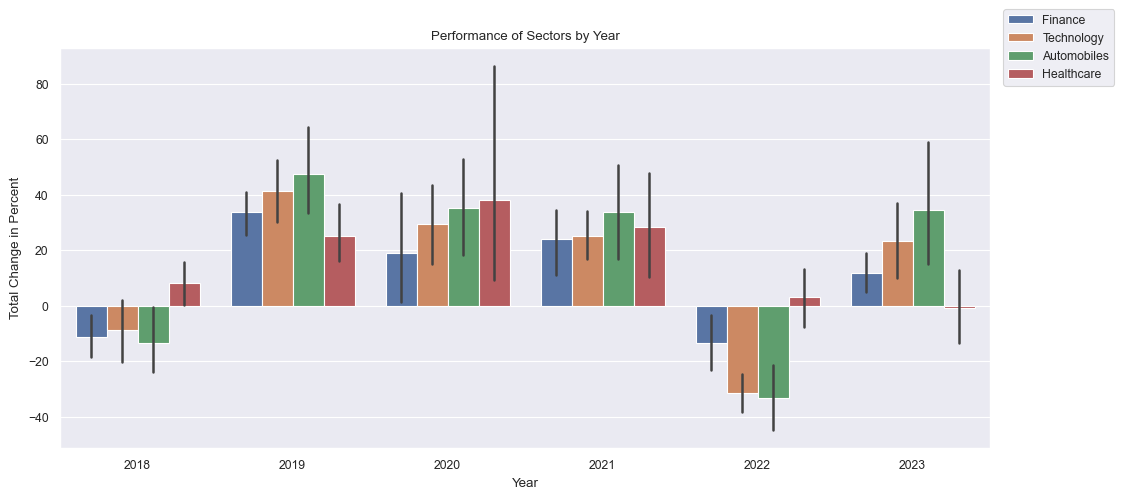

In [13]:
#Plot data by Year and Sector
plt.figure(figsize=(12, 5.2))
sns.barplot(top_by_year, x="Year", y="Total Change in Percent", hue="Sector").set(title='Performance of Sectors by Year')

plt.legend(loc = "right", bbox_to_anchor=(1.14, 1))

#Save the Output
# plt.savefig("Finances/fig3.png")

#Show the Output
plt.show()

Then, it locate the stock with most positive change in price for each year and plots the data using hvplot.

In [14]:
#Group the data by Year to ticker data with th max positive change in price for that year
grouped_df1 = top_by_year.groupby(["Year"])["Total Change in Percent"].idxmax()
best_by_year = top_by_year.iloc[grouped_df1, :]

#Show the result
best_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
54,AMD,2018,Automobiles,Semiconductors,10.42,18.46,77.159309
129,AMD,2019,Automobiles,Semiconductors,18.01,45.86,154.636313
222,MRNA,2020,Healthcare,Biotechnology,19.57,104.47,433.827287
300,MRNA,2021,Healthcare,Biotechnology,107.23,253.98,136.855358
384,MRK,2022,Healthcare,Drug Manufacturers,76.58,110.95,44.881170
440,NVDA,2023,Automobiles,Semiconductors,148.51,455.10,206.444011


# **Top Performers by Year**

In [15]:
# Configure the map plot
best_yearly = best_by_year.hvplot.barh(
                            "Year",
                            "Total Change in Percent",
                            frame_width = 600,
                            frame_height = 300,
                            color = "Ticker",
                            colorbar = True,
                            clabel="Year", 
                            cmap="Greens",
                            hover_cols = ["Ticker", "Year", "Sector", "Industry", "Initial Open", "Final Close", "Total Change in Percent"],
                            title = "Top Performers by Year"

)
    
#Show the Output
best_yearly

:Bars   [Year]   (Total Change in Percent,Ticker,Sector,Industry,Initial Open,Final Close)

Then, it locate the stock with most negative change in price for each year and plots the data using hvplot.

# **Bottom Performers by Year**

In [16]:
#Group the data by Year to ticker data with th max negative change in price for that year
grouped_df2 = top_by_year.groupby(["Year"])["Total Change in Percent"].idxmin()
worst_by_year = top_by_year.iloc[grouped_df2, :]

#Show the Output
worst_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
45,ALV,2018,Automobiles,Auto Parts,127.51,70.23,-44.921967
105,LPL,2019,Technology,Consumer,8.00,6.94,-13.250000
179,AAPL,2020,Technology,Consumer,296.24,132.69,-55.208615
230,LDI,2021,Finance,Mortgage,14.00,4.80,-65.714284
355,TSLA,2022,Automobiles,Auto Manufacturers,1147.75,123.18,-89.267698
459,MRNA,2023,Healthcare,Biotechnology,180.85,79.01,-56.311861


In [17]:
# Configure the map plot
plt.figure(figsize = (12, 5.2))
worst_yearly = worst_by_year.hvplot.barh(
                            "Year",
                            "Total Change in Percent",
                            frame_width = 600,
                            frame_height = 300,
                            color = "Ticker",
                            colorbar = True,
                            clabel="Year", 
                            cmap="Oranges",
                            hover_cols = ["Ticker", "Year", "Sector", "Industry", "Initial Open", "Final Close", "Total Change in Percent"],
                            title = "Bottom Performers by Year"

)


# Display the results
worst_yearly

:Bars   [Year]   (Total Change in Percent,Ticker,Sector,Industry,Initial Open,Final Close)

<Figure size 1200x520 with 0 Axes>